In [2]:
!pip install scipy

In [3]:
import scipy
from scipy import integrate
result, error =integrate.quad(lambda x: x**2,0,1)
print("result:",result)
print("error:",error)

result: 0.33333333333333337
error: 3.700743415417189e-15


In [4]:
add_numbers =lambda x,y:x+y
result =add_numbers(4,6)
print("result:",result)

result: 10


In [5]:
import numpy as np
from scipy import optimize
result_optimization=optimize.minimize_scalar(lambda x:x**2 +3*x +5)
print("optimization result:",result_optimization.x)

optimization result: -1.5000000000000002


In [6]:
import numpy as np
from scipy import interpolate
x_data=np.array([0,1,2,3,4])
y_data=np.array([0,2,1,3,5])
interp_func=interpolate.interp1d(x_data,y_data,kind='linear')
interp_result=interp_func(2.5)
print("interpolation result :",interp_result)

interpolation result : 2.0


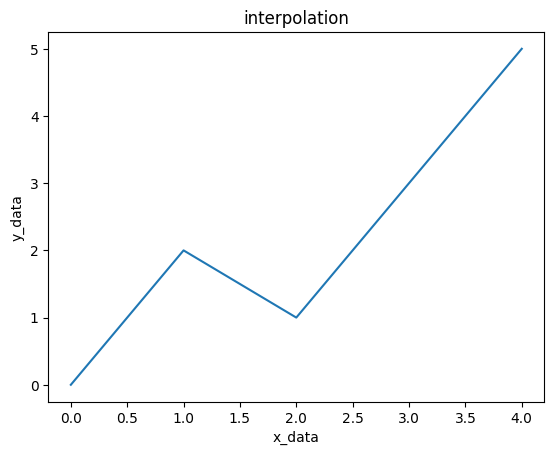

In [7]:
import matplotlib.pyplot as plt
plt.plot(x_data,y_data)
plt.title("interpolation")
plt.xlabel("x_data")
plt.ylabel("y_data")
plt.show()

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
import pandas as pd
np.random.seed(0)
data=pd.DataFrame({'treatment':np.random.choice(['a','b','c'],size=100),'score':np.random.normal(loc=10,scale=2,size=100)})
print(data)

   treatment      score
0          a   8.626821
1          b  10.029747
2          a   9.248668
3          b   9.923553
4          b  10.735949
..       ...        ...
95         a   9.933528
96         c  10.131283
97         a  10.531571
98         b  12.303684
99         c  10.276086

[100 rows x 2 columns]


In [ ]:
import random
random.seed(0)
print(random.random())
print(random.random())

0.8444218515250481
0.7579544029403025


In [ ]:
group_A=data[data['treatment']=='a']['score']
group_B=data[data['treatment']=='b']['score']
t_stat,p_value=stats.ttest_ind(group_A,group_B)
print('t_statistic:',t_stat)
print('p_value:',p_value)

t_statistic: -1.0341676575352792
p_value: 0.3045674995802033


In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
import pandas as pd
np.random.seed(0)
data=pd.DataFrame({'treatment':np.random.choice(['a','b','c'],size=100),'col1':np.random.normal(loc=10,scale=2,size=100),'col2':np.random.normal(loc=10,scale=2,size=100)})
print(data)

   treatment       col1       col2
0          a   8.626821   9.704389
1          b  10.029747  13.367655
2          a   9.248668  11.943664
3          b   9.923553  13.215348
4          b  10.735949   9.485745
..       ...        ...        ...
95         a   9.933528   9.169544
96         c  10.131283   8.721828
97         a  10.531571  14.995535
98         b  12.303684   3.989744
99         c  10.276086   8.252006

[100 rows x 3 columns]


In [ ]:
group_A=data['col1']
group_B=data['col2']
d=np.mean(group_A)
print(d)
e=np.mean(group_B)
print(e)
t_stat,p_value=stats.ttest_ind(group_A,group_B)
print('t_statistic:',t_stat)
print('p_value:',p_value)

9.885027355938945
9.993385841577414
t_statistic: -0.37474035374731685
p_value: 0.7082546394277651


In [ ]:
f_stat,p_value=stats.f_oneway(data[data['treatment']=='a']['col1'],
                              data[data['treatment']=='b']['col1'],
                              data[data['treatment']=='c']['col1'])
print('f_statistic:',f_stat)
print('p_value:',p_value)

f_statistic: 0.6019178068930898
p_value: 0.5497930622874936


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Combine all data into a single array
all_data = np.concatenate([group1, group2, group3])
# Create labels for groups
labels = ['Group 1'] * len(group1) + ['Group 2'] * len(group2) + ['Group 3'] * len(group3)
# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(all_data, labels, alpha=0.05)
# Print pairwise comparisons
print(tukey_results)
# Get confidence intervals for specific pairwise comparisons
print(tukey_results.confint_diff())

NameError: name 'col1' is not defined

In [ ]:
import numpy as np
import statsmodels.api as sm

# Sample data
x = np.array([1, 2, 3, 4, 5])  # Independent variable
y = np.array([2, 4, 5, 4, 5])  # Dependent variable

# Add a constant to the independent variable (for intercept estimation)
x = sm.add_constant(x)

# Create OLS model
model = sm.OLS(y, x)

# Fit the model
results = model.fit()

# Print summary of results
print(results.summary())
x=sm.add_constant(data['treatment'].replace({'a':0,'b':1,'c':2}))
model=sm.OLS(data['col1'],x)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4.500
Date:                Sat, 17 Feb 2024   Prob (F-statistic):              0.124
Time:                        09:29:49   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2000      0.938      2.345      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
